In [10]:
import pandas as pd

data_source = 'dataDistribusi.csv'
df = pd.read_csv(data_source, delimiter=",")

df

,itemCode,dscription,codeBars,mnfctrCode,salesItem,purchItem,returnItem,classCode,uom1,uom2,...,objType,auditDate,auditUser,backupSts,uom4,isFocus,isTM,isNPL,longdesc,forCod
0,PW01001,PROBABY,NaN,0.0,N,N,Y,2,1,42,...,2023,11/14/23 0:00,admin,Y,4200,NaN,N,N,,N
1,PW01002,PROBABY,NaN,0.0,N,N,Y,2,1,16,...,2023,11/14/23 0:00,admin,Y,1600,NaN,N,N,,N
2,PW01003,PROBABY,NaN,0.0,N,N,Y,2,1,24,...,2023,11/14/23 0:00,admin,Y,2400,NaN,N,N,,N
3,PW02001,PROBABY,NaN,0.0,N,N,Y,2,1,42,...,2023,11/14/23 0:00,admin,Y,4200,NaN,N,N,,N
4,PW02002,PROBABY,NaN,0.0,N,N,Y,2,1,16,...,2023,11/14/23 0:00,admin,Y,1600,NaN,N,N,,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,YR40006,Evany,ESC 871396,0.0,Y,Y,Y,2,1,12,...,2023,2/3/23 0:00,admin,Y,1200,NaN,N,N,,N
1223,YR40007,Evany,ESC 871393,0.0,Y,Y,Y,2,1,12,...,2023,2/3/23 0:00,admin,Y,1200,NaN,N,N,,N
1224,YR40008,Evany,ESC 871394,0.0,Y,Y,Y,2,1,12,...,2023,2/3/23 0:00,admin,Y,1200,NaN,N,N,,N
1225,YR41001,Evany,ETB871267,0.0,Y,Y,Y,2,1,4,...,2023,2/3/23 0:00,admin,Y,400,NaN,N,N,,N


In [11]:
df['codeBars'].value_counts()

codeBars
8995028208953    5
8995028208755    2
LIG252922B       2
7499221234333    2
7499221174318    2
                ..
8998183118112    1
8998183208158    1
8998183208165    1
8998183208189    1
CTO376390        1
Name: count, Length: 954, dtype: int64

In [12]:
df.isna().sum()

itemCode         0
dscription       0
codeBars       260
mnfctrCode      22
salesItem        0
purchItem        0
returnItem       0
classCode        0
uom1             0
uom2             0
uom3             0
length           0
length1          0
width            0
width1           0
height           0
height1          0
weight1          0
weight2          0
lstSalDate       0
lstPurDate       0
regDate          0
locked           0
objType          0
auditDate        0
auditUser        0
backupSts        0
uom4             0
isFocus       1227
isTM             0
isNPL            0
longdesc         0
forCod           0
dtype: int64

In [13]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import OrdinalEncoder

smote = SMOTE(k_neighbors=4)
x_binary = OrdinalEncoder()
x = x_binary.fit_transform(df)
cols = df.columns

# print(cols)

x = pd.DataFrame(x, columns = cols)

# print(x)

x_source = x.drop(['itemCode','codeBars', 'mnfctrCode', 'salesItem', 'purchItem', 'returnItem', 'classCode', 
                   'length', 'length1', 'width', 'width1', 'height', 'height1', 'weight1', 'weight2',
                   'locked', 'auditDate', 'auditUser', 'backupSts', 'isFocus', 'isTM', 'isNPL', 
                   'longdesc', 'forCod'], axis=1)
# print(x_source)

y = x['purchItem']

print(y)
print(y.shape)

x_smote, y_smote = smote.fit_resample(x_source, y)
print(x_smote)
y_smote.value_counts()

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1222    1.0
1223    1.0
1224    1.0
1225    1.0
1226    1.0
Name: purchItem, Length: 1227, dtype: float64
(1227,)
      dscription  uom1       uom2  uom3  lstSalDate  lstPurDate  regDate  \
0           56.0   0.0  19.000000   0.0        10.0        10.0     10.0   
1           56.0   0.0  10.000000   0.0        10.0        10.0     10.0   
2           56.0   0.0  13.000000   0.0        10.0        10.0     10.0   
3           56.0   0.0  19.000000   0.0        10.0        10.0     10.0   
4           56.0   0.0  10.000000   0.0        10.0        10.0     10.0   
...          ...   ...        ...   ...         ...         ...      ...   
2339        62.0   0.0  17.000000   0.0         4.0         4.0      4.0   
2340        56.0   0.0  13.000000   0.0        10.0        10.0     10.0   
2341        56.0   0.0  10.000000   0.0        10.0        10.0     10.0   
2342        56.0   0.0   6.758151   0.0        10.0   

purchItem
0.0    1172
1.0    1172
Name: count, dtype: int64

In [14]:
print(x_smote)

      dscription  uom1       uom2  uom3  lstSalDate  lstPurDate  regDate  \
0           56.0   0.0  19.000000   0.0        10.0        10.0     10.0   
1           56.0   0.0  10.000000   0.0        10.0        10.0     10.0   
2           56.0   0.0  13.000000   0.0        10.0        10.0     10.0   
3           56.0   0.0  19.000000   0.0        10.0        10.0     10.0   
4           56.0   0.0  10.000000   0.0        10.0        10.0     10.0   
...          ...   ...        ...   ...         ...         ...      ...   
2339        62.0   0.0  17.000000   0.0         4.0         4.0      4.0   
2340        56.0   0.0  13.000000   0.0        10.0        10.0     10.0   
2341        56.0   0.0  10.000000   0.0        10.0        10.0     10.0   
2342        56.0   0.0   6.758151   0.0        10.0        10.0     10.0   
2343        56.0   0.0  13.000000   0.0        10.0        10.0     10.0   

      objType       uom4  
0         0.0  19.000000  
1         0.0  10.000000  
2     

<Axes: >

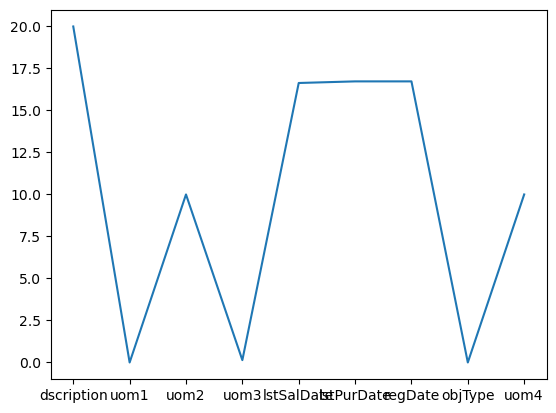

In [15]:
x_smote.std()
x_smote.std().plot()

<Axes: >

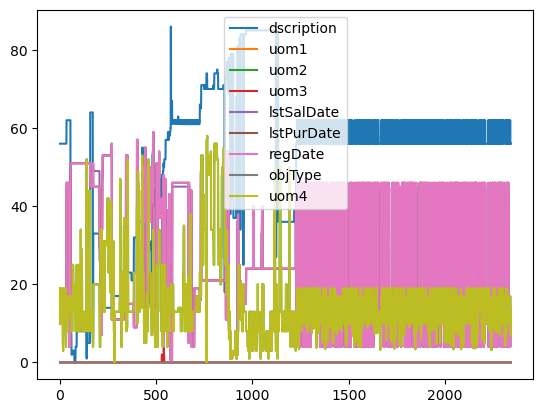

In [16]:
x_smote.plot()

In [17]:
x_smote.value_counts()

dscription  uom1  uom2       uom3  lstSalDate  lstPurDate  regDate  objType  uom4     
56.0        0.0   10.000000  0.0   10.0        10.0        10.0     0.0      10.000000    235
62.0        0.0   13.000000  0.0   45.0        46.0        46.0     0.0      13.000000    186
                  17.000000  0.0   4.0         4.0         4.0      0.0      17.000000    178
56.0        0.0   13.000000  0.0   10.0        10.0        10.0     0.0      13.000000    172
                  19.000000  0.0   10.0        10.0        10.0     0.0      19.000000    160
                                                                                         ... 
                  7.187742   0.0   10.0        10.0        10.0     0.0      7.187742       1
                  7.130786   0.0   10.0        10.0        10.0     0.0      7.130786       1
                  7.109132   0.0   10.0        10.0        10.0     0.0      7.109132       1
                  7.104752   0.0   10.0        10.0        10.0    

In [18]:
x_smote.describe()

,dscription,uom1,uom2,uom3,lstSalDate,lstPurDate,regDate,objType,uom4
count,2344.000000,2344.0,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.0,2344.000000
mean,53.052474,0.0,15.664937,0.007679,23.498814,23.576723,23.576723,0.0,15.664937
std,19.970620,0.0,9.986535,0.139907,16.611747,16.707278,16.707278,0.0,9.986535
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,49.000000,0.0,10.000000,0.000000,10.000000,10.000000,10.000000,0.0,10.000000
50%,56.000000,0.0,13.000000,0.000000,19.000000,19.000000,19.000000,0.0,13.000000
75%,62.000000,0.0,19.000000,0.000000,45.000000,45.000000,45.000000,0.0,19.000000
max,86.000000,0.0,58.000000,4.000000,59.000000,59.000000,59.000000,0.0,58.000000
